<a href="https://colab.research.google.com/github/haidernawaz108/AI-PROJECT-2025/blob/main/NOTEBOOK/PHASE_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PHASE-1: DATA LOADING AND EXPLORATION**

**1.1: INSTALLING REQUIRED LIBRARIES**

In [ ]:
!pip install -q tensorflow keras numpy matplotlib seaborn scikit-learn pillow


**1.2: EXTRACTING DATASET**

In [ ]:
!unzip -oq "/content/brain-tumor/data.zip" -d "/content/data.zip/"





**1.3: COPYING EXTRACTED DATASET TO DRIVE**

In [ ]:
!rsync -av --progress "/content/data.zip/Brain_Cancer/" "/content/drive/MyDrive/datasets/brain_cancer/"


Streaming output truncated to the last 5000 lines.
         29,879 100%   26.29kB/s    0:00:01 (xfr#60, ir-chk=3770/4012)
brain_glioma/brain_glioma_0248.jpg
         23,452 100%   16.95kB/s    0:00:01 (xfr#61, ir-chk=3760/4012)
brain_glioma/brain_glioma_0256.jpg
         17,493 100%   12.64kB/s    0:00:01 (xfr#62, ir-chk=3752/4012)
brain_glioma/brain_glioma_0257.jpg
         18,713 100%   13.52kB/s    0:00:01 (xfr#63, ir-chk=3751/4012)
brain_glioma/brain_glioma_0259.jpg
         19,111 100%   13.80kB/s    0:00:01 (xfr#64, ir-chk=3749/4012)
brain_glioma/brain_glioma_0260.jpg
         25,916 100%   18.72kB/s    0:00:01 (xfr#65, ir-chk=3748/4012)
brain_glioma/brain_glioma_0262.jpg
         22,167 100%    0.00kB/s    0:00:00 (xfr#66, ir-chk=3746/4012)
brain_glioma/brain_glioma_0272.jpg
         26,736 100%   25.50MB/s    0:00:00 (xfr#67, ir-chk=3736/4012)
brain_glioma/brain_glioma_0278.jpg
         28,240 100%  626.78kB/s    0:00:00 (xfr#68, ir-chk=3730/4012)
brain_glioma/brain_glioma_0292

**1.4: CHECKING FOLDERS IN DRIVE**

In [ ]:
import os

base_dir = "/content/drive/MyDrive/datasets/brain_cancer"
print(os.listdir(base_dir))


['brain_menin', 'brain_glioma', 'brain_tumor']


**1.5: COUNTING IMAGES IN EACH CLASS**

In [ ]:
for cls in os.listdir(base_dir):
    path = os.path.join(base_dir, cls)
    if os.path.isdir(path):
        n = len([f for f in os.listdir(path) if f.lower().endswith(('.jpg','.jpeg','.png'))])
        print(f"{cls}: {n}")


brain_menin: 2004
brain_glioma: 2004
brain_tumor: 2048


**1.6: DISPLAYING SAMPLE IMAGES OF EACH CLASS**

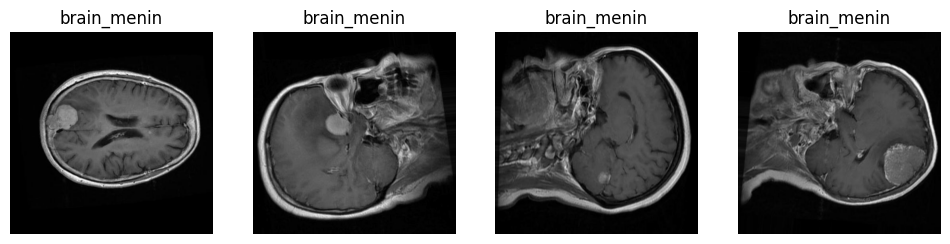

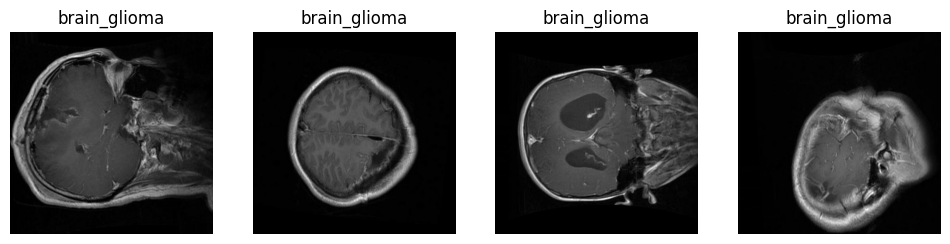

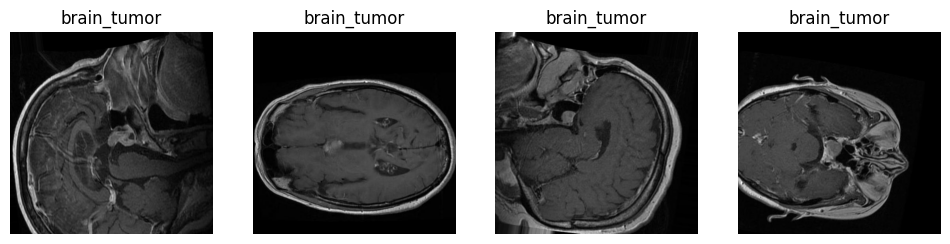

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random, os

def show_samples(base, n=4):
    classes = [d for d in os.listdir(base) if os.path.isdir(os.path.join(base,d))]

    for cls in classes:
        folder = os.path.join(base, cls)
        imgs = [f for f in os.listdir(folder) if f.lower().endswith(('.png','.jpg','.jpeg'))]
        sample = random.sample(imgs, min(n, len(imgs)))

        plt.figure(figsize=(12,3))
        for i, imgfile in enumerate(sample):
            img = Image.open(os.path.join(folder, imgfile))
            plt.subplot(1, n, i+1)
            plt.imshow(img, cmap='gray')
            plt.title(cls)
            plt.axis("off")
        plt.show()

show_samples(base_dir, 4)


**1.7: CHECKING IMAGES COMMON SIZE**

In [ ]:
from PIL import Image
from collections import Counter

sizes = Counter()
limit = 2000  # analyze first 2000 images

count = 0
for cls in os.listdir(base_dir):
    folder = os.path.join(base_dir, cls)
    if not os.path.isdir(folder):
        continue
    for img in os.listdir(folder):
        if img.lower().endswith(('.jpg','.jpeg','.png')):
            try:
                im = Image.open(os.path.join(folder, img))
                sizes[im.size] += 1
            except:
                pass
            count += 1
            if count >= limit:
                break
    if count >= limit:
        break

print("Most common image sizes:")
print(sizes.most_common(20))


Most common image sizes:
[((512, 512), 2000)]


**1.8: CREATING CSV FILE FOR REPORT**

In [ ]:
import pandas as pd

rows = []

for cls in os.listdir(base_dir):
    path = os.path.join(base_dir, cls)
    if os.path.isdir(path):
        for img in os.listdir(path):
            if img.lower().endswith(('.jpg','.jpeg','.png')):
                rows.append({
                    "class": cls,
                    "path": os.path.join(path, img)
                })

df = pd.DataFrame(rows)
df.to_csv(base_dir + "/manifest.csv", index=False)

df.head()


,class,path
0,brain_menin,/content/drive/MyDrive/datasets/brain_cancer/b...
1,brain_menin,/content/drive/MyDrive/datasets/brain_cancer/b...
2,brain_menin,/content/drive/MyDrive/datasets/brain_cancer/b...
3,brain_menin,/content/drive/MyDrive/datasets/brain_cancer/b...
4,brain_menin,/content/drive/MyDrive/datasets/brain_cancer/b...


**1.9: SPLITTING DATASET INTO TRAIN/VAL/TEST**

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

source_dir = "/content/drive/MyDrive/datasets/brain_cancer"
output_dir = "/content/drive/MyDrive/datasets/brain_cancer_split"

classes = ['brain_glioma', 'brain_menin', 'brain_tumor']

splits = ['train', 'val', 'test']

# Create output dirs
for s in splits:
    for cls in classes:
        os.makedirs(os.path.join(output_dir, s, cls), exist_ok=True)

for cls in classes:
    cls_path = os.path.join(source_dir, cls)
    images = [f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg','.jpeg','.png'))]

    train_imgs, temp = train_test_split(images, test_size=0.30, random_state=42)
    val_imgs, test_imgs = train_test_split(temp, test_size=0.50, random_state=42)

    # Copy train
    for img in train_imgs:
        shutil.copy2(os.path.join(cls_path, img),
                     os.path.join(output_dir, "train", cls, img))

    # Copy val
    for img in val_imgs:
        shutil.copy2(os.path.join(cls_path, img),
                     os.path.join(output_dir, "val", cls, img))

    # Copy test
    for img in test_imgs:
        shutil.copy2(os.path.join(cls_path, img),
                     os.path.join(output_dir, "test", cls, img))

print("Train/Val/Test split complete!")


Train/Val/Test split complete!


**1.10: COUNTING IMAGES IN TRAIN/VAL/TEST**

In [ ]:
import os

base = "/content/drive/MyDrive/datasets/brain_cancer_split"

for split in ["train", "val", "test"]:
    print(f"\n=== {split.upper()} ===")
    for cls in os.listdir(os.path.join(base, split)):
        path = os.path.join(base, split, cls)
        print(cls, "→", len(os.listdir(path)))



=== TRAIN ===
brain_glioma → 1402
brain_menin → 1402
brain_tumor → 1433

=== VAL ===
brain_glioma → 301
brain_menin → 301
brain_tumor → 307

=== TEST ===
brain_glioma → 301
brain_menin → 301
brain_tumor → 308
